Say we've got a simple binary classification dataset.

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np

data = load_breast_cancer()

X = data.data
y = data.target

print(X.shape, y.shape)

(569, 30) (569,)


And we throw an arbitrary model at it

In [2]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

true_probs = model.predict_proba(X)[:, 1]
preds = (true_probs > .5).astype(int)

The model will yield some distribution of predictions on the confusion matrix.

In [3]:
from sklearn.metrics import confusion_matrix
from helpers import print_cm

result = confusion_matrix(y, preds)
print_cm(result)

                     Actual
                  False   True
Predicted  False    198     14
            True      9    348


### Accuracy measures

As a measure of accuracy, we can calculate **precision** with the following

$\frac{TP}{TP + FP}$

or "How good we were at predicting `True` if we say it's `True`"

In [4]:
precision = result[1][1] / (result[1][1] + result[1][0])
precision

0.97478991596638653

Similarly, **recall** is 

$\frac{TP}{TP + FN}$

or, "How good were we at identifying all of the `True` examples in our set?"

In [5]:
recall = result[1][1] / (result[1][1] + result[0][1])
recall

0.96132596685082872

Both of these have simple implementations in `sklearn`

In [6]:
from sklearn.metrics import precision_score, recall_score

print('Precision:', precision_score(y, preds))
print('Recall:', recall_score(y, preds))

Precision: 0.961325966851
Recall: 0.974789915966


### Graphically

Wikipedia has an excellent graphic representing these two metrics

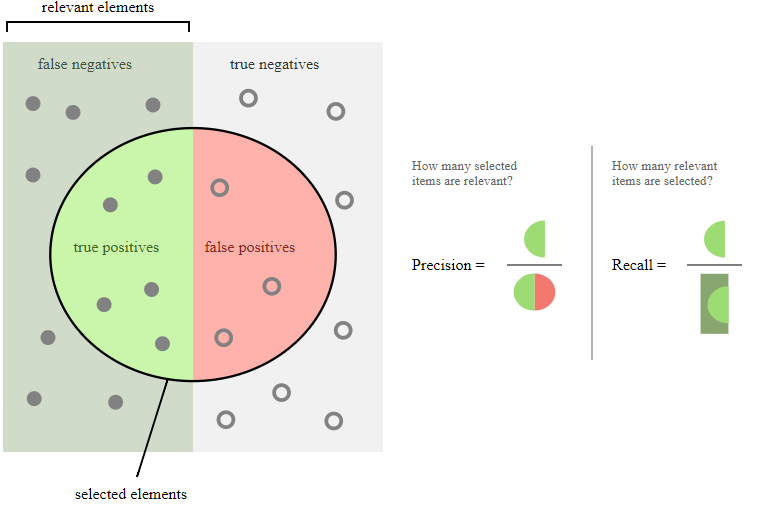

In [7]:
from IPython.display import Image

Image('images/precision_recall.PNG')

## Best of both

Per the [sklearn docs](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html):

>A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

The `f1_score` is a statistic that "averages together" the two accuracy notions above via the "Harmonic mean"

$\frac{2}{\frac{1}{precision}\frac{1}{recall}}$

In [8]:
2 / ((1/precision) + (1/recall))

0.96801112656467303

Of course, it, too, is located in `sklearn.metrics`

In [9]:
from sklearn.metrics import f1_score

print('F1 score:', f1_score(y, preds))

F1 score: 0.968011126565
